## Ejercicio 1
El siguiente url entrega 1000 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos

## Ejercicio 2
### 2a):
Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10, es decir
$$ p(x)=(x-x_0)\cdot(x-x_1)\cdots(x-x_6), $$
donde $(x_0,x_1,\ldots x_6)$ son números aleatorios entre 1 y 10.

### 2b) 
Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

### 2c) 
Con alguno de los métodos para encontrar mínimos compruebe que el punto crítico con menor (mayor) valor para el polinomio, corresponde al mínimo (máximo) global del polinomio en el rango de 1 a 10.

### 2d) 
Grafique el polinomío incluyendo los puntos criticos.

# Solución
## Ejercicio 1

In [236]:
import pandas as pd

In [339]:
issn='1029-8479'
items=100
crf='https://api.crossref.org'

In [340]:
url='{}/journals/{}/works?rows={}'.format(
              crf,issn,items)
url

'https://api.crossref.org/journals/1029-8479/works?rows=100'

In [341]:
df=pd.read_json(url)
df

,status,message-type,message-version,message
facets,ok,work-list,1.0.0,{}
items,ok,work-list,1.0.0,"[{'indexed': {'date-parts': [[2020, 3, 30]], '..."
items-per-page,ok,work-list,1.0.0,100
query,ok,work-list,1.0.0,"{'start-index': 0, 'search-terms': None}"
total-results,ok,work-list,1.0.0,31567


La base de datos anindad en fila `'items` y columna `'message'` es una lista de diccionarios, de modo que se puede cargar como otro DataFrame para facilitar su visualización y análisis

In [346]:
dff=pd.DataFrame( df.loc['items','message'] )

In [347]:
dff[:1]

,DOI,ISSN,URL,alternative-id,article-number,assertion,author,container-title,content-domain,created,...,relation,score,short-container-title,source,subject,title,type,update-policy,update-to,volume
0,10.1088/1126-6708/2001/03/051,[1029-8479],http://dx.doi.org/10.1088/1126-6708/2001/03/051,NaN,NaN,NaN,"[{'given': 'Juan José', 'family': 'Manjarín', ...",[Journal of High Energy Physics],"{'domain': [], 'crossmark-restriction': False}","{'date-parts': [[2002, 8, 25]], 'date-time': '...",...,NaN,1.0,[J. High Energy Phys.],Crossref,NaN,[Dilatonic Wilson loops],journal-article,NaN,NaN,2001


La columna `author` contiene los datos requeridos

In [348]:
f='Alessandro' 
l='Strumia'
dfa=dff[( dff['author'].astype(str).str.contains(l) &
     dff['author'].astype(str).str.contains(f)
     )]
dfa

,DOI,ISSN,URL,alternative-id,article-number,assertion,author,container-title,content-domain,created,...,relation,score,short-container-title,source,subject,title,type,update-policy,update-to,volume
2,10.1088/1126-6708/2000/12/016,[1029-8479],http://dx.doi.org/10.1088/1126-6708/2000/12/016,NaN,NaN,NaN,"[{'given': 'Riccardo', 'family': 'Barbieri', '...",[Journal of High Energy Physics],"{'domain': [], 'crossmark-restriction': False}","{'date-parts': [[2002, 7, 26]], 'date-time': '...",...,NaN,1.0,[J. High Energy Phys.],Crossref,NaN,[Non standard analysis of the solar neutrino a...,journal-article,NaN,NaN,2000
92,10.1088/1126-6708/2001/11/048,[1029-8479],http://dx.doi.org/10.1088/1126-6708/2001/11/048,NaN,NaN,NaN,"[{'given': 'Alessandro', 'family': 'Strumia', ...",[Journal of High Energy Physics],"{'domain': [], 'crossmark-restriction': False}","{'date-parts': [[2002, 8, 24]], 'date-time': '...",...,NaN,1.0,[J. High Energy Phys.],Crossref,NaN,[Which solar neutrino experiment after KamLAND...,journal-article,NaN,NaN,2001


La lista de DOIS del autor Alessadro Strumia es:

In [349]:
dfa.DOI.to_list()

['10.1088/1126-6708/2000/12/016', '10.1088/1126-6708/2001/11/048']

## Ejercicio 2

In [ ]:
%pylab inline

In [33]:
import numpy as np
from scipy import optimize

## 2a)

In [331]:
p=np.poly1d( np.random.uniform(1,10,7),r=True )

## 2b)
Puntos críticos del polinomio

In [332]:
c=p.deriv().roots
c

array([6.91790009, 6.80594061, 5.37413449, 3.78324784, 2.57176337,
       1.77628349])

con valores para el polinomio dados por

In [333]:
p(c)

array([-1.17187979e-01,  4.65088766e-02, -9.04079489e+01,  4.07851836e+01,
       -4.33575441e+01,  2.44378403e+01])

### 2c)

In [334]:
xmin=c[p(c).argsort()[0]]
xmin

5.374134490214993

Compruebe el mínimo global

In [335]:
optimize.minimize(p,xmin,bounds=((1,10),))['x']

array([5.37413447])

Compruebe el máximo global

In [336]:
xmax=c[p(c).argsort()[-1]]
xmax

3.783247842609016

In [337]:
optimize.minimize(-p,xmax,bounds=((1,10),))['x']

array([3.78324786])

## 2d)

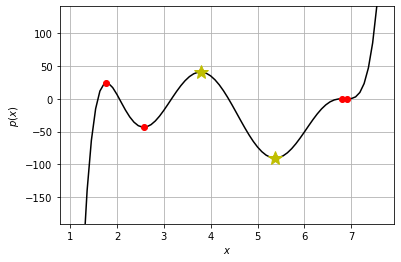

In [338]:
x=np.linspace(1,10,100)
plt.plot(x,p(x),'k-')
plt.plot(c,p(c),'ro')
plt.plot(xmin,p(xmin),'y*',markersize=15)
plt.plot(xmax,p(xmax),'y*',markersize=15)
plt.ylim(p(c).min()-100,p(c).max()+100)
plt.xlim(c.min()-1,c.max()+1)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid()

## Ejercicio
Un vehículo parte del reposo en un punto con una aceleración constante de $a_1$. 10 segundos después pasa por el mismo punto, y en la misma dirección, un segundo vehículo con una rapidez de 10 m/s y con aceleración constante $a_2$. Calcule el punto de encuentro: 
1. Gráficamente 
1. Encontrando las raíces del polinomio generado a partir de igualar las dos ecuaciones de movimiento.
1. Grafique el polinomio generado

_Ayuda:_
La ecuación de movimiento para el movimiento uniformemente acelerado es:
\begin{align}
x=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2\,,
\end{align}
donde
* $x_0$ es la posición inicial
* $v_0$ es la rapidez inicial
* $t_0$ es el tiempo inicial

Ejecute la siguiente celda para fijar los valores de las aceleraciones en su caso

In [7]:
%pylab inline
import numpy as np
a1=np.random.choice([2,3,4,5,6])
a2=a1+4
print('a1={} m/s² and a2={} m/s²'.format(a1,a2))

Populating the interactive namespace from numpy and matplotlib
a1=5 m/s² and a2=9 m/s²


In [8]:
from scipy import optimize

Se establecen las condiciones iniciales y se definen las ecuaciones de movimiento

In [9]:
x0=0 #Posición inicial para 1 y 2
v0=10 #Velocidad inicial de 2
t0=10 #Tiempo inicial de 2

x1 = lambda t: x0+0.5*a1*t**2
x2 = lambda t: x0+v0*(t-t0)+0.5*a2*(t-t0)**2

## 1. Gráficamente

In [ ]:
plt.xlabel('Tiempo [s]', size=13)
plt.ylabel('Posición [m]', size=13)

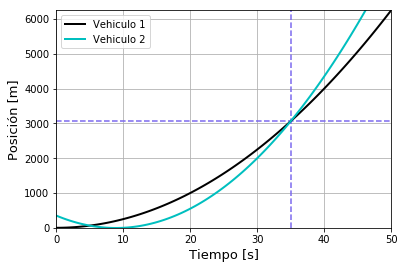

In [42]:
t = np.linspace(0,50,100)
plt.plot(t,x1(t), 'k', label="Vehiculo 1", linewidth=2)
plt.plot(t,x2(t), 'c', label="Vehiculo 2", linewidth=2)
plt.legend()
plt.vlines(35,0,x1(t).max(), 'mediumslateblue', linestyles='--')
plt.hlines(x1(35),0,t.max(), 'mediumslateblue', linestyles='--')
plt.xlabel('Tiempo [s]', size=13)
plt.ylabel('Posición [m]', size=13)
plt.xlim(0,50)
plt.ylim(0,x1(50))
plt.grid()

Gráficamente el punto de encuentro se da aproximadamente cuando t = 35 s a más de 3000 m 

## 2. Hallando las raíces del polinomio

Se define le polinomio y se hallan sus raíces con el método de Newton

In [28]:
x = lambda t: x1(t)-x2(t)
tf=optimize.newton(x,30) #Encuentra la raiz utilizando el metodo de Newton 
tf

35.0

In [29]:
print('El punto de encuentro es en x = {} m cuando t = {} s'.format(x1(tf),tf))

El punto de encuentro es en x = 3062.5 m cuando t = 35.0 s


## 3. Graficando el polinomio

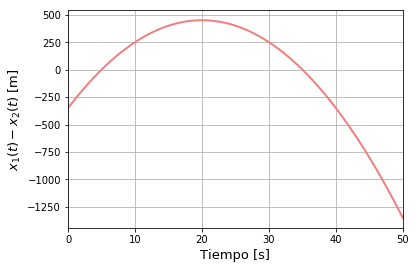

In [49]:
plt.plot(t,x(t), 'lightcoral', linewidth=2)
plt.xlabel('Tiempo [s]', size = 13)
plt.ylabel('$x_1(t)-x_2(t)$ [m]', size = 13)
plt.xlim(0,50)
plt.grid()

Así, se ve que después de t =10s el polinomio $x_1(t)-x_2(t)$ es 0 cuando t = 35s

In [1]:
import numpy as np

In [2]:
np.sort?

Signature: np.sort(a, axis=-1, kind=None, order=None)
Docstring:
Return a sorted copy of an array.

Parameters
----------
a : array_like
    Array to be sorted.
axis : int or None, optional
    Axis along which to sort. If None, the array is flattened before
    sorting. The default is -1, which sorts along the last axis.
kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
    Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
    and 'mergesort' use timsort or radix sort under the covers and, in general,
    the actual implementation will vary with data type. The 'mergesort' option
    is retained for backwards compatibility.

    .. versionchanged:: 1.15.0.
       The 'stable' option was added.

order : str or list of str, optional
    When `a` is an array with fields defined, this argument specifies
    which fields to compare first, second, etc.  A single field can
    be specified as a string, and not all fields need be specified,
    but unspecif

In [3]:
import numpy as np

In [12]:
np.random.seed(98554576)

In [13]:
np.random.random()

0.8089943552589222